In [1]:
import numpy as np 

# reading data into numpy arrays from csv:
x = np.genfromtxt('x.csv', delimiter=',')
y = np.genfromtxt('y.csv', delimiter=',')


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline

Plotting the original data

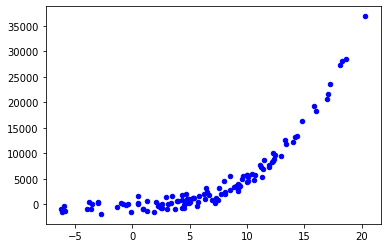

In [3]:
plt.scatter(x,y, s=20, c="blue")
plt.show()

Linear model l(x) using all of the data

In [4]:
(aFull, bFull) =np.polyfit(x,y,1) 
print("Coefficients:")
print(aFull, bFull)

Coefficients:
989.348038661085 -1970.8684011409123


Predicting l(1) and l(10)

In [5]:
pFull = np.poly1d((aFull, bFull))
p1Full = pFull(1)
print(f"Linear Model: {pFull}")
print(f"l(1) = {p1Full}")
p10Full = pFull(10)
print(f"l(10) = {p10Full}")

Linear Model:  
989.3 x - 1971
l(1) = -981.5203624798273
l(10) = 7922.611985469936


Plotting data with linear model l(x) including predicted values on the line

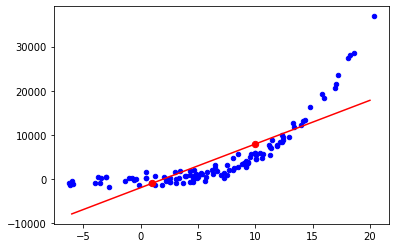

In [6]:
h=np.linspace(-6, 20, 50)
line=aFull*h+bFull
plt.scatter(x,y, s=20, c="blue")
plt.scatter(1,pFull(1), s=40, c='red')
plt.scatter(10,pFull(10), s=40, c='red')
plt.plot(h,line,'r-')
plt.show()

In [7]:
def splitData(x: np.array ,y: np.array):
    ''' Splits data into training and testing data. 
        Training data includes first 100 values and testing data includes the last 20 values.'''
    Xtrain = x[:100]
    ytrain = y[:100]
    Xtest = x[100:]
    ytest = y[100:]

    return Xtrain, ytrain, Xtest, ytest

Linear model $l_{train}(x)$

In [8]:
Xtrain, ytrain, Xtest, ytest = splitData(x,y)
(aTrain, bTrain) = np.polyfit(Xtrain, ytrain, 1)
print("Coefficients:")
print(aTrain, bTrain)


Coefficients:
978.874787442746 -1831.5837920219044


Predicting $l_{train}(1)$ and $l_{train}(10)$

In [9]:
pTrain = np.poly1d((aTrain, bTrain))
p1Tr = pTrain(1)
print(f"Linear Model: {pTrain}")
print(f"l_train(1) {p1Tr}")
p10Tr = pTrain(10)
print(f"l_train(10) = {p10Tr}")

Linear Model:  
978.9 x - 1832
l_train(1) -852.7090045791584
l_train(10) = 7957.164082405555


Plotting model from training data

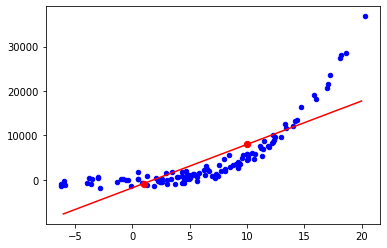

In [10]:
h=np.linspace(-6, 20, 50)
line=aTrain*h+bTrain
plt.scatter(x,y, s=20, c="blue")
plt.scatter(1,pTrain(1), s=40, c='red')
plt.scatter(10,pTrain(10), s=40, c='red')
plt.plot(h,line,'r-')
plt.show()

Residual vector from full data set linear model on test set:

In [11]:
residualFull = ytest - pFull(Xtest)
print(residualFull)


[-3463.47739197 -2072.08079001   689.14620547  4618.81273305
 -2710.37426236   257.70409366 -1369.26675441 -2510.45471837
 12060.6111947    287.90297551  -494.61697012  5322.78096968
 -1353.62246595 -3653.34911631 -3215.07465914 -1918.67154601
 -2880.94542358 -1952.44679002   311.80759072 -2956.98040998]


Residual vector from train data set linear model on test set:

In [12]:
# Residual vector from train-data-set-linear model on test set:
residualTrain = ytest - pTrain(Xtest)
print(residualTrain)

[-3497.69820317 -2106.61520813   548.4378854   4442.10791683
 -2797.92537808   127.69500382 -1463.26053579 -2596.99168792
 12116.62457662   184.51957157  -588.37103494  5152.0019565
 -1473.28809264 -3711.9063167  -3306.78651079 -1956.96651309
 -2908.48720286 -2039.62591239   319.04215269 -3050.90733251]


In [13]:
def calculateRMSE(residuals: np.array):
    squaredRs = 0
    n = len(residuals)
    for r in residuals:
        squaredRs += r**2
        
    return np.sqrt(squaredRs/n)

Calculating RMSE from full data set residual vector and training data set residual vector

In [14]:
fullRMSE = calculateRMSE(residualFull)
print(f"Full data set residual vector RMSE: {fullRMSE}")

trainRMSE = calculateRMSE(residualTrain)
print(f"Training data set residual vector RMSE: {trainRMSE}")

Full data set residual vector RMSE: 3727.9709449186794
Training data set residual vector RMSE: 3741.0796335936566


In [15]:
def expandSetX(x: np.array, p: int):
    ''' Returns polynomial expansion of x of degree p. '''
    vectors = []
    for x_i in x:
        arr = [1]
        for i in range(1, p+1):
            arr.append(x_i**i)
        vectors.append(arr)
    X = np.array(vectors)

    return X

Expanding data set X using standard polynomial expansion with p = 3

In [16]:
XBar = expandSetX(Xtrain, p=3)
# to verify:
print(x[:3])
print(XBar[:3, :])


[0.94548344 2.06646005 2.44175016]
[[ 1.          0.94548344  0.89393893  0.84520445]
 [ 1.          2.06646005  4.27025713  8.82431575]
 [ 1.          2.44175016  5.96214383 14.55806563]]


Building 3-degree polynomial model using XBar

In [17]:
import numpy.linalg as LA

a = LA.inv(XBar.T @ XBar) @ XBar.T @ ytrain
print("Coefficients:")
print(a)
p3 = lambda x : a[0] + a[1]*x + a[2]*x**2 + a[3]*x**3

Coefficients:
[-134.74576802   29.45439173    8.84184199    3.95600698]


In [18]:
# RMSE of residual vector built from testing data:
deg3ResidualTest = ytest - p3(Xtest)
deg3RMSETest = calculateRMSE(deg3ResidualTest)
print(f"Root Mean Squared Error from testing set: {deg3RMSETest}")

Root Mean Squared Error from testing set: 888.602154794261


In [19]:
# RMSE of residual vector built from training data:
deg3ResidualTrain = ytrain - p3(Xtrain)
deg3RMSETrain = calculateRMSE(deg3ResidualTrain)
print(f"Root Mean Squared Error from training set: {deg3RMSETrain}")


Root Mean Squared Error from training set: 840.017933390936


Plotting degree-3 polynomial model from training data

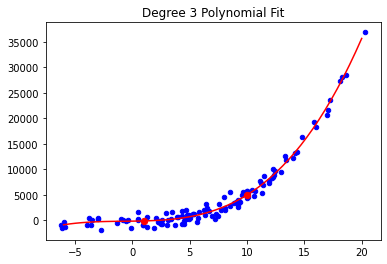

In [20]:
h=np.linspace(-6, 20, 50)
line=p3(h)
plt.scatter(x,y, s=20, c="blue")
plt.scatter(1,p3(1), s=40, c='red')
plt.scatter(10,p3(10), s=40, c='red')
plt.plot(h,line,'r-')
plt.title("Degree 3 Polynomial Fit")
plt.show()